<a href="https://colab.research.google.com/github/Aanya05gautam/Online-Retail-Clustering-Project/blob/main/Online_Retail_Clustering_Project_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online Retail Clustering Project



##### **Project Type**    - Clustering
##### **Contribution**    - Individual
##### **Name of Member  -** Aanya Gautam

# **Project Summary -**

In this project, I worked on customer segmentation using clustering techniques on the Online Retail dataset, which contains over 500,000 transactions. I began with data cleaning by removing missing CustomerIDs, cancelled invoices, and entries with zero or negative values. Then I performed exploratory data analysis to understand product sales, country-wise revenue, and customer trends. I created RFM (Recency, Frequency, Monetary) features for each customer. For clustering, I used both K-Means and Agglomerative Clustering. I used the Elbow Method and Silhouette Score to determine the optimal number of clusters for K-Means. I also used a dendrogram to visualize the results of Agglomerative Clustering. Finally, I analyzed the clusters to understand different customer types and purchasing behavior. This project gave me hands-on experience with clustering techniques and showed how businesses can use customer data for better decision-making and marketing strategies.

# **GitHub Link -**

Github Link : https://github.com/Aanya05gautam/Online-Retail-Clustering-Project

# **Problem Statement**


This project aims to segment customers of an online retail store based on their purchase behavior using clustering techniques. By analyzing transaction data and generating RFM (Recency, Frequency, Monetary) features, the goal is to group similar customers to help the business understand customer patterns and enable targeted marketing strategies.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [19]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [21]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/new/Copy of Online Retail.xlsx - Online Retail.csv')

### Dataset First View

In [22]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [23]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

### Dataset Information

In [24]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [25]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(5268)

#### Missing Values/Null Values

In [26]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


<Axes: >

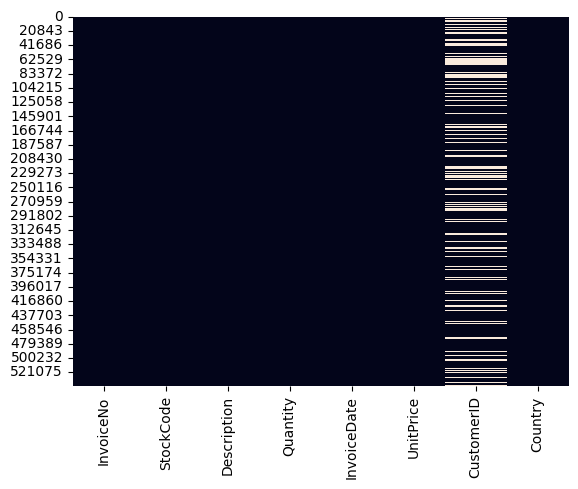

In [27]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

The dataset is from a UK-based online retail store and contains over 500,000 transaction records between December 2010 and December 2011. It includes columns such as InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country. From the data, I observed that:

- The majority of transactions come from the United Kingdom.

- There were missing values in the CustomerID column.

- Some invoices were cancellations, identified by InvoiceNo starting with 'C'.

- There were negative and zero values in Quantity and UnitPrice, which needed to be removed.

- I created a new feature, TotalPrice, by multiplying Quantity and UnitPrice to calculate transaction-level revenue.

- The dataset is suitable for customer behavior analysis, especially using RFM (Recency, Frequency, Monetary) modeling for clustering.

## ***2. Understanding Your Variables***

In [28]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [29]:
# Dataset Describe
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description

- `InvoiceNo:`
A unique number assigned to each invoice or transaction.

  ➤ If it starts with 'C', it indicates a cancellation.

- `StockCode:`
A unique code assigned to each product/item sold.

- `Description:`
The name or short description of the product.

- `Quantity:`
The number of units of the product sold in that transaction.

  ➤ Can be negative in case of returns or errors.

- `InvoiceDate:`
The date and time when the transaction occurred.

- `UnitPrice:`
The price of a single unit of the product (in GBP).

- `CustomerID:`
A unique identifier for each customer.

  ➤ Some entries are missing, indicating anonymous customers.

- `Country:`
The country from which the order was placed.

  ➤ Most transactions come from the United Kingdom.

### Check Unique Values for each variable.

In [30]:
# Check Unique Values for each variable.
df.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


In [31]:
df['Country'].value_counts()

,count
Country,
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519


## 3. ***Data Wrangling***

### Data Wrangling Code

In [32]:
# Calculating the Missing Values % contribution in DF
df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

,0
InvoiceNo,0.00
StockCode,0.00
Description,0.27
Quantity,0.00
InvoiceDate,0.00
UnitPrice,0.00
CustomerID,24.93
Country,0.00


In [33]:
# Check if any InvoiceNo starts with 'C'
df['InvoiceNo'] = df['InvoiceNo'].astype(str)  # Ensure it's string type
df[df['InvoiceNo'].str.startswith('C')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom


In [34]:
#Replacing null values in 'CustomerID' column with 'unknown'
df['CustomerID'].replace(np.nan, "unknown",inplace  = True)

#Replacing null values in 'Description	' column with 'unknown'
df['Description'].replace(np.nan, "Missing Description",inplace  = True)

# Remove all null values in date_added.
df.dropna(inplace = True)

# Create a TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [35]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [36]:
#Check null values
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
TotalPrice,0


### What all manipulations have you done and insights you found?

Manipulations Done (Data Wrangling Steps):
---
- Missing Values Analysis

- Converted InvoiceNo to string to handle cancellations.

- Identified cancelled invoices (those starting with 'C') using:

- Handling Missing Values

- CustomerID: Replaced all NaN values with "unknown" to retain data but differentiate missing values.

- Description: Replaced NaN with "Missing Description" for clarity.

- Dropped any remaining null rows using df.dropna(inplace=True) — most likely affected rows like InvoiceDate.

- Feature Creation

  Created a new feature TotalPrice = Quantity × UnitPrice to measure transaction value.

- Data Type Conversion

  Converted InvoiceDate column to proper datetime format for time-based analysis.

- Final Null Check

  Verified that all null values were handled successfully.



🔍 Insights You Might Have Found
---
- A significant number of missing values were found in CustomerID and Description.

- Presence of cancelled transactions, indicated by invoice numbers starting with 'C'.

- Creating TotalPrice enabled:

- Identifying high-value transactions.

- Performing revenue-based analysis per country, customer, or time period.

- Converting InvoiceDate helps with:

  Time-series analysis like peak purchasing times.

- Customer recency/frequency analysis for clustering or segmentation.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

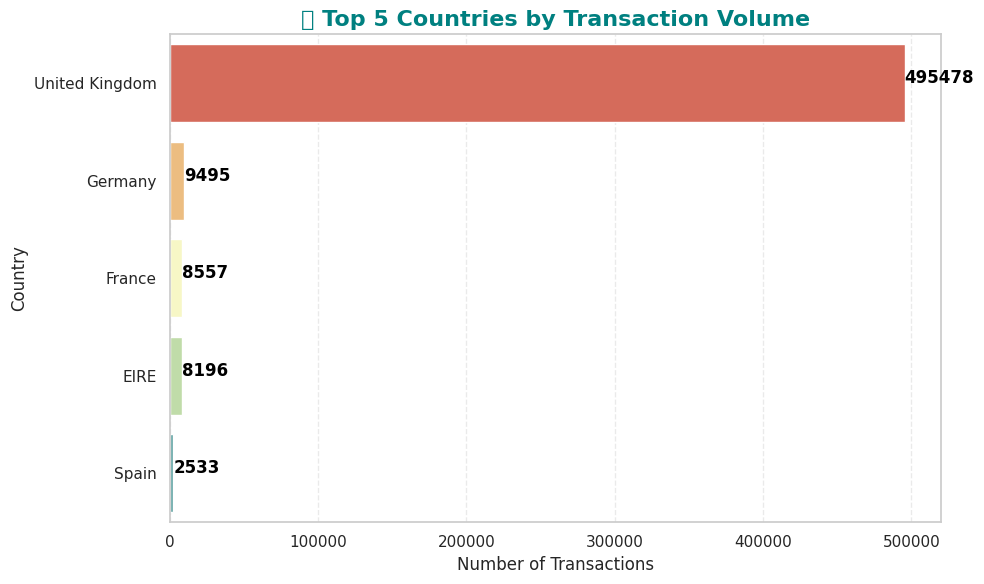

In [79]:
# Chart - 1 visualization code
top_countries = df['Country'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Spectral')

# Add value labels
for i, v in enumerate(top_countries.values):
    plt.text(v + 50, i, str(v), color='black', fontweight='bold')

# Title and labels
plt.title('🌍 Top 5 Countries by Transaction Volume', fontsize=16, fontweight='bold', color='teal')
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


#### Chart - 2

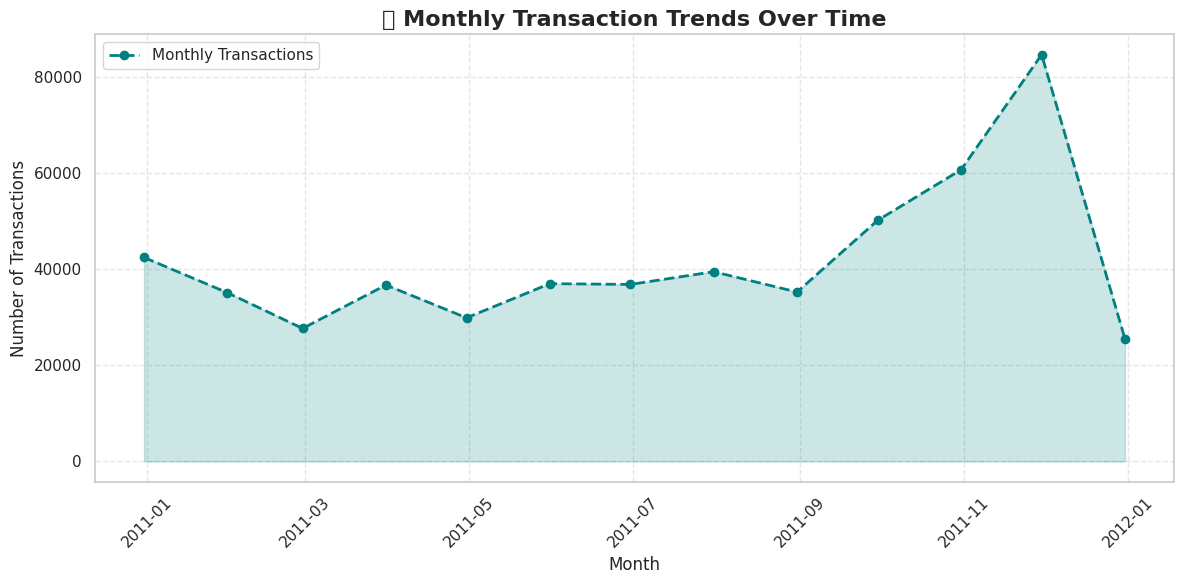

In [73]:
# Chart - 2 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid')

# Create the monthly invoice count series
monthly_invoices = df.set_index('InvoiceDate')['Description'].resample('M').count()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_invoices.index, monthly_invoices.values,
         marker='o', color='teal', linewidth=2, linestyle='--', label='Monthly Transactions')

# Add area under the curve for better visuals
plt.fill_between(monthly_invoices.index, monthly_invoices.values, color='teal', alpha=0.2)

# Titles and labels
plt.title('📈 Monthly Transaction Trends Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)

# Rotate x-ticks for clarity
plt.xticks(rotation=45)

# Show gridlines and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

#### Chart - 3

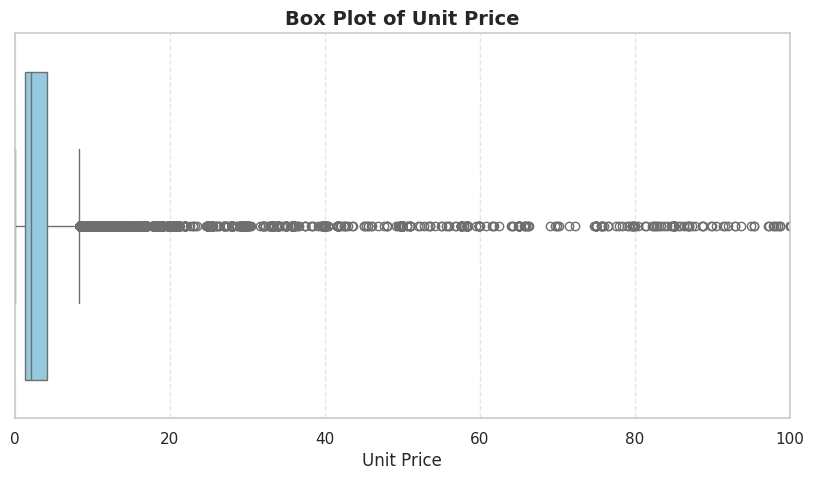

In [78]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['UnitPrice'], color='skyblue')
plt.title('Box Plot of Unit Price', fontsize=14, fontweight='bold')
plt.xlabel('Unit Price')
plt.xlim(0, 100)  # remove extreme outliers
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


#### Chart - 4

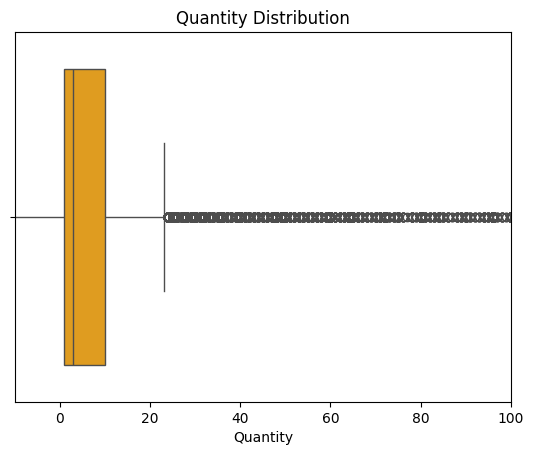

In [40]:
# Chart - 4 visualization code
sns.boxplot(x=df['Quantity'], color='orange')
plt.xlim(-10, 100)
plt.title('Quantity Distribution')
plt.show()

#### Chart - 5

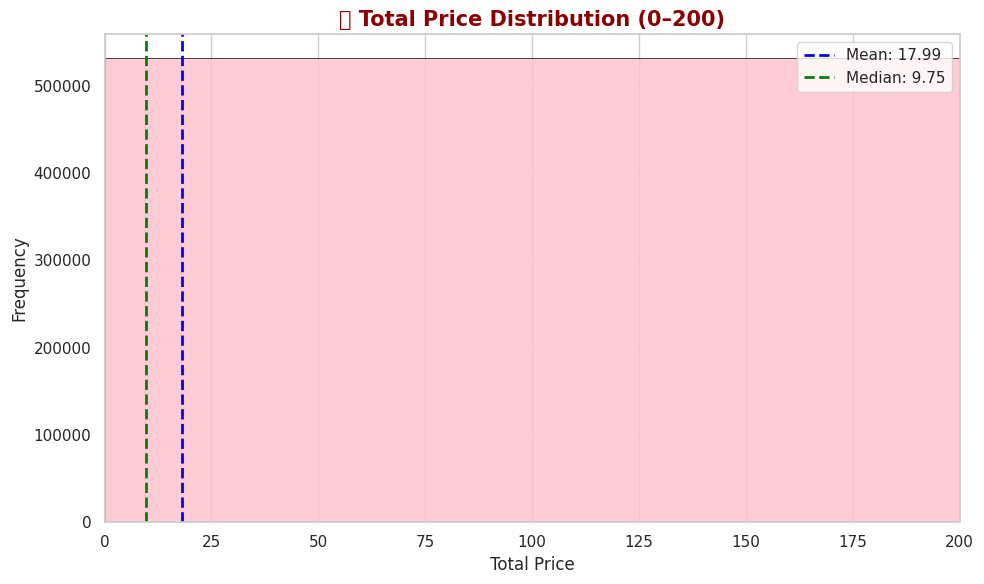

In [84]:
# Chart - 5 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPrice'], bins=100, color='pink', edgecolor='black', alpha=0.8)

# Limit x-axis to focus on most data (remove extreme outliers)
plt.xlim(0, 200)

# Add vertical lines for mean & median
mean_price = df['TotalPrice'].mean()
median_price = df['TotalPrice'].median()
plt.axvline(mean_price, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='--', linewidth=2, label=f'Median: {median_price:.2f}')

# Titles and labels
plt.title('💰 Total Price Distribution (0–200)', fontsize=15, fontweight='bold', color='darkred')
plt.xlabel('Total Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


#### Chart - 6

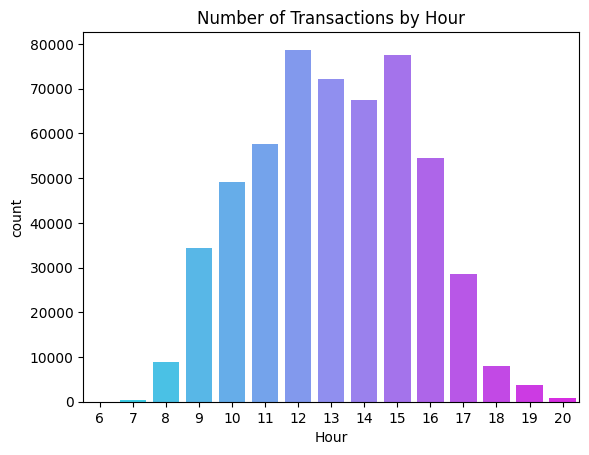

In [42]:
# Chart - 6 visualization code
df['Hour'] = df['InvoiceDate'].dt.hour
sns.countplot(x='Hour', data=df, palette='cool')
plt.title('Number of Transactions by Hour')
plt.show()

#### Chart - 7

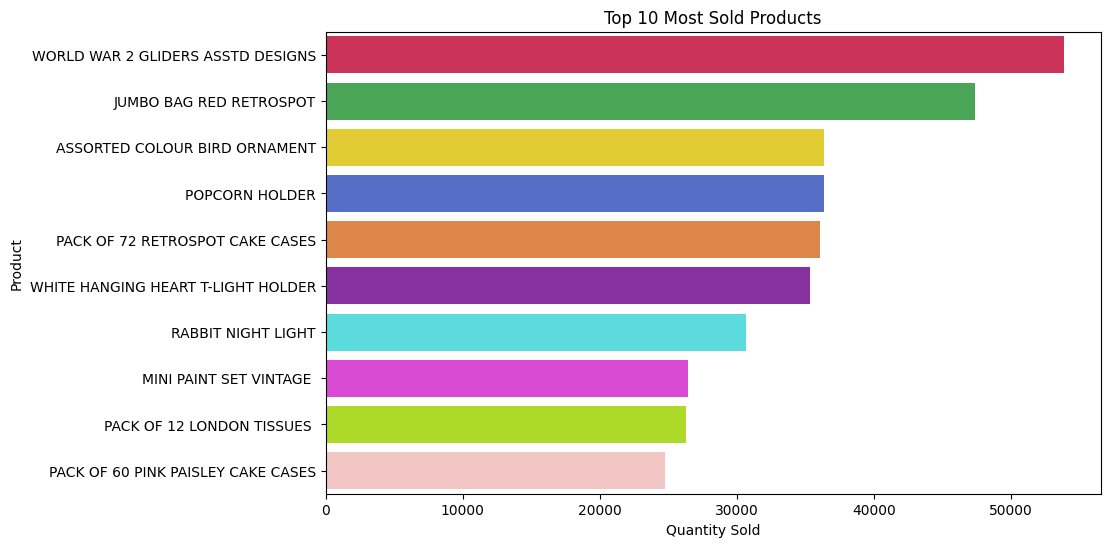

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom 10-color palette
custom_colors = [
    "#e6194b", "#3cb44b", "#ffe119", "#4363d8", "#f58231",
    "#911eb4", "#46f0f0", "#f032e6", "#bcf60c", "#fabebe"
]

# Get top products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Convert to DataFrame so each bar can take a different color
top_products_df = top_products.reset_index()

# Plot with seaborn to apply palette correctly
plt.figure(figsize=(10,6))
sns.barplot(
    x='Quantity',
    y='Description',
    data=top_products_df,
    palette=custom_colors
)
plt.title('Top 10 Most Sold Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.show()



#### Chart - 8

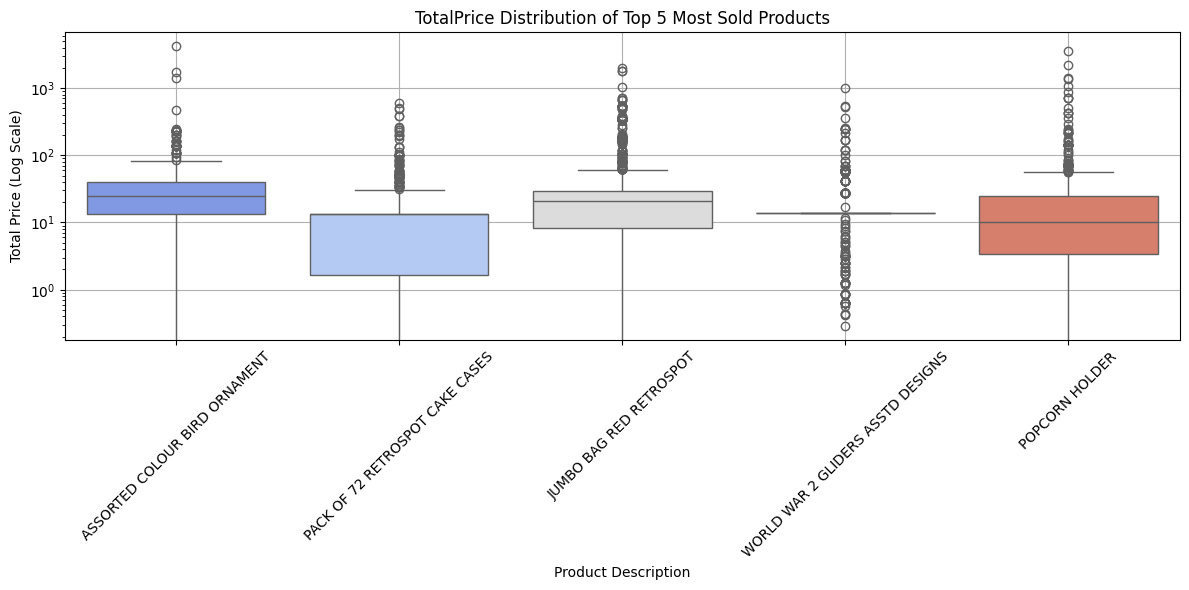

In [44]:
# Chart - 8 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# First, calculate TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Get top 5 products by quantity sold
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5).index

# Filter only those top products
filtered_df = df[df['Description'].isin(top_products)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Description', y='TotalPrice', palette='coolwarm')
plt.yscale('log')  # To manage large price differences
plt.title('TotalPrice Distribution of Top 5 Most Sold Products')
plt.xlabel('Product Description')
plt.ylabel('Total Price (Log Scale)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Chart - 9

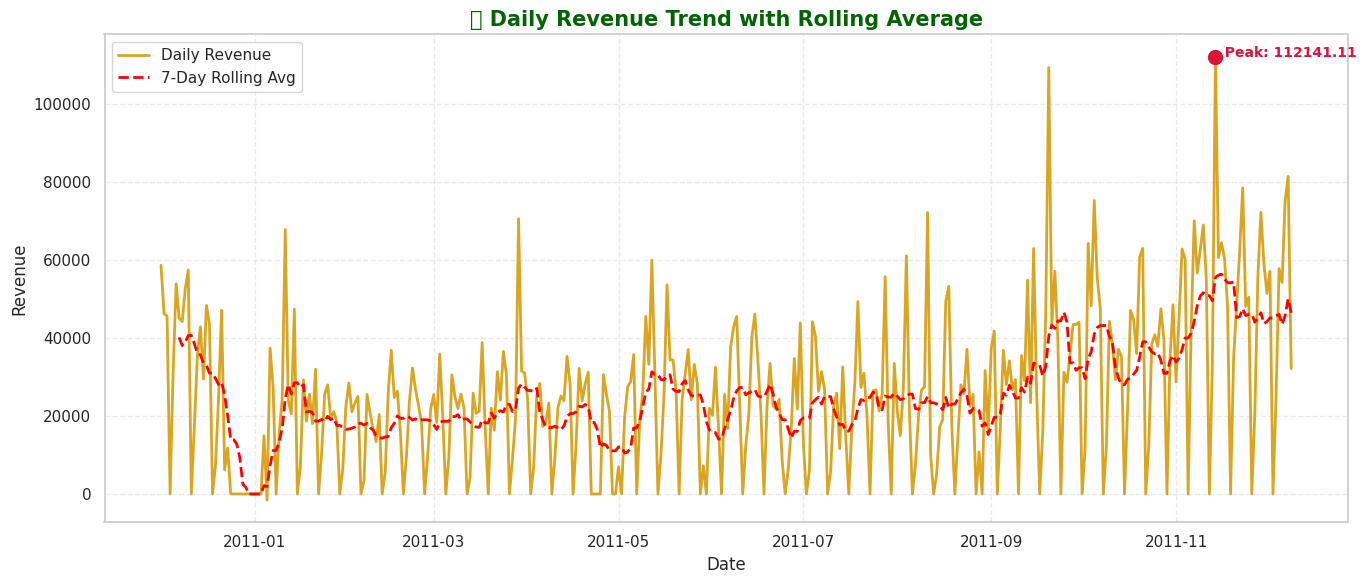

In [85]:
# Chart - 9 visualization code
# Resample and calculate daily revenue
daily_rev = df.set_index('InvoiceDate').resample('D')['TotalPrice'].sum()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(daily_rev.index, daily_rev.values, color='goldenrod', linewidth=2, label='Daily Revenue')

# Add rolling average (7-day) for smoother trend
rolling_avg = daily_rev.rolling(window=7).mean()
plt.plot(rolling_avg.index, rolling_avg.values, color='red', linestyle='--', linewidth=2, label='7-Day Rolling Avg')

# Mark peak point
peak_day = daily_rev.idxmax()
peak_value = daily_rev.max()
plt.scatter(peak_day, peak_value, color='crimson', s=100, zorder=5)
plt.text(peak_day, peak_value, f'  Peak: {peak_value:.2f}', color='crimson', fontsize=10, fontweight='bold')

# Customize appearance
plt.title('📈 Daily Revenue Trend with Rolling Average', fontsize=15, fontweight='bold', color='darkgreen')
plt.ylabel('Revenue', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


#### Chart - 10

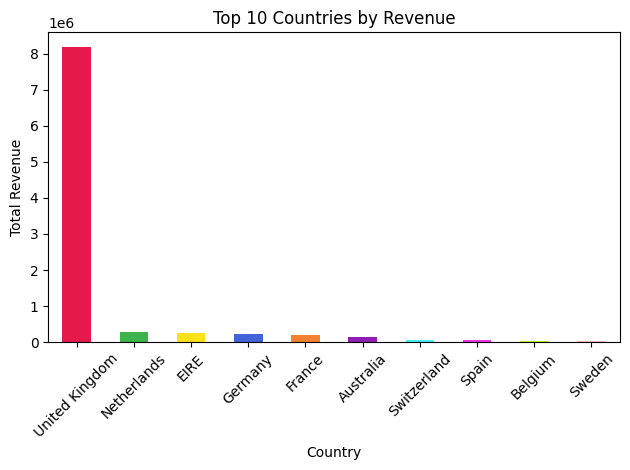

In [46]:
# Chart - 10 visualization code
import matplotlib.pyplot as plt

# Custom 10-color list
custom_colors = [
    "#e6194b", "#3cb44b", "#ffe119", "#4363d8", "#f58231",
    "#911eb4", "#46f0f0", "#f032e6", "#bcf60c", "#fabebe"
]

# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Group and sort revenue by country
country_rev = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Plot with individual bar colors
country_rev.plot(kind='bar', color=custom_colors)

# Customize chart
plt.title('Top 10 Countries by Revenue')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Chart - 11

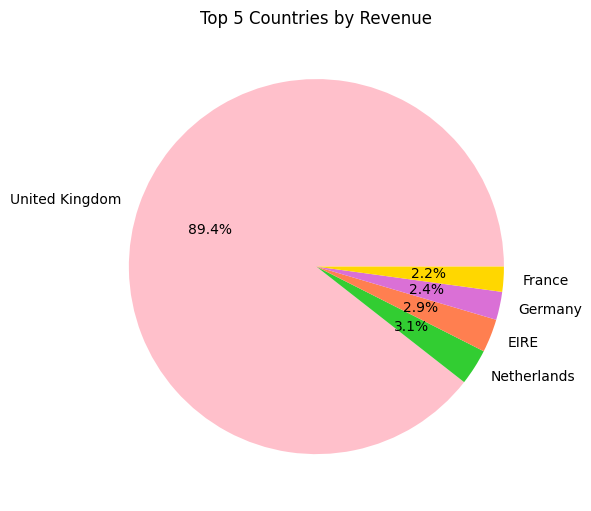

In [47]:
# Chart - 11 visualization code
import matplotlib.pyplot as plt

# Calculate TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Group by country and get top 5
country_rev = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5)

# Simple pie chart
plt.figure(figsize=(6, 6))
country_rev.plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'limegreen', 'coral', 'orchid', 'gold'])
plt.title('Top 5 Countries by Revenue')
plt.ylabel('')
plt.tight_layout()
plt.show()


#### Chart - 12

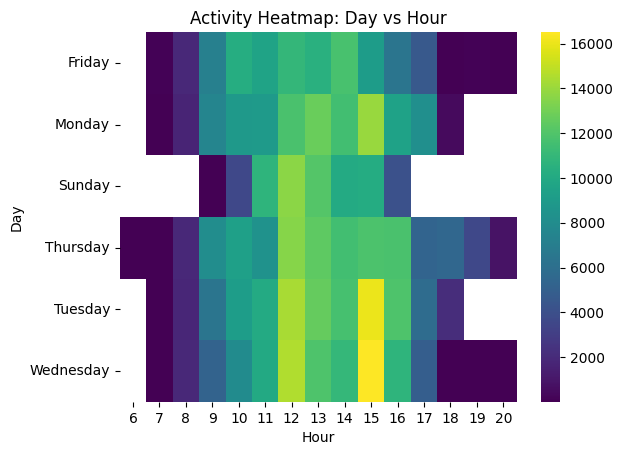

In [48]:
# Chart - 12 visualization code
df['Day'] = df['InvoiceDate'].dt.day_name()
pivot = df.pivot_table(index='Day', columns='Hour', values='InvoiceNo', aggfunc='count')
sns.heatmap(pivot, cmap='viridis')
plt.title('Activity Heatmap: Day vs Hour')
plt.show()

#### Chart - 13

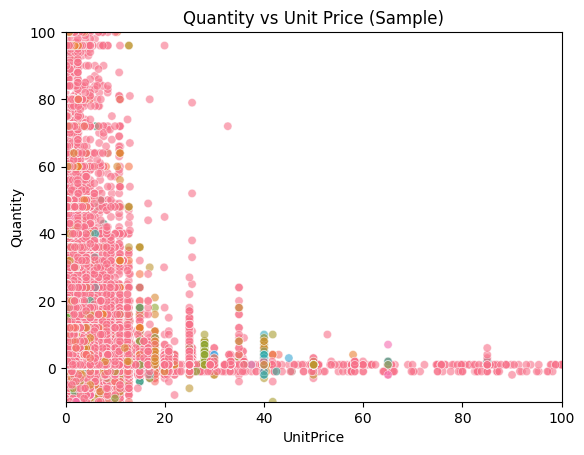

In [49]:
# Chart - 13 visualization code
sns.scatterplot(x='UnitPrice', y='Quantity', data=df, hue='Country', palette='husl', alpha=0.6)
plt.xlim(0,100)
plt.ylim(-10,100)
plt.title('Quantity vs Unit Price (Sample)')
plt.legend([],[], frameon=False)
plt.show()

#### Chart - 14 - Correlation Heatmap

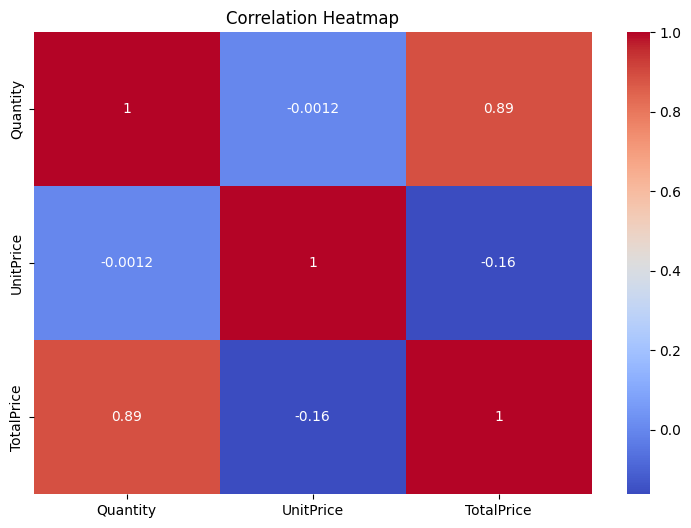

In [50]:
# Correlation Heatmap visualization code
plt.figure(figsize=(9,6))
sns.heatmap(df[['Quantity', 'UnitPrice', 'TotalPrice']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## ***6. Feature Engineering & Data Pre-processing***

In [51]:
import datetime

# Set a reference date for recency (e.g., max date + 1)
ref_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,     # Recency
    'InvoiceNo': 'nunique',                                 # Frequency
    'TotalPrice': 'sum'                                     # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [52]:
# Average Basket Size
basket_size = df.groupby('CustomerID')['Quantity'].mean().reset_index(name='AvgBasketSize')
rfm = rfm.merge(basket_size, on='CustomerID')

In [53]:
# Number of unique products bought
unique_products = df.groupby('CustomerID')['StockCode'].nunique().reset_index(name='UniqueProducts')
rfm = rfm.merge(unique_products, on='CustomerID')

🔹 Recency:
How recently a customer made a purchase.
📌 Lower recency value = more recent purchase = more engaged customer.

🔹 Frequency:
How often the customer makes a purchase.
📌 Higher frequency = loyal/repeat customer.

🔹 Monetary:
How much money the customer has spent.
📌 Higher monetary value = high-value customer.

### 2. Handling Outliers

In [54]:
# Handling Outliers & Outlier treatments
def remove_outliers_iqr_all(df, feature_list):
    for col in feature_list:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Features to check
features = ['Recency', 'Frequency', 'Monetary', 'AvgBasketSize', 'UniqueProducts']

# Apply to your RFM dataframe
rfm_cleaned = remove_outliers_iqr_all(rfm, features)

# Show shape before and after
print(f"Original shape: {rfm.shape}")
print(f"After outlier removal: {rfm_cleaned.shape}")

Original shape: (4373, 6)
After outlier removal: (3139, 6)


##### What all outlier treatment techniques have you used and why did you use those techniques?

I used the Interquartile Range (IQR) method to handle outliers in features like Recency, Frequency, Monetary, AvgBasketSize, and UniqueProducts. This method removes extreme values that fall outside the normal range (Q1 - 1.5×IQR to Q3 + 1.5×IQR), helping reduce the impact of unusual customer behavior. IQR is simple, effective, and improved the quality of clustering by making the data more consistent and reliable.

### 3. Categorical Encoding

In [55]:
# One-hot encode Country
encoded_df = pd.get_dummies(df[['CustomerID', 'Country']], drop_first=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

In this project, I used One-Hot Encoding to handle categorical variables, specifically for the Country column. One-Hot Encoding creates binary columns for each category, allowing machine learning models to process categorical data effectively without assuming any ordinal relationship between categories. I used drop_first=True to avoid the dummy variable trap, which helps prevent multicollinearity. This method is simple, widely used, and well-suited for nominal variables like countries.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [56]:
# Manipulate Features to minimize feature correlation and create new features
import pandas as pd
import numpy as np

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

corr_matrix = numeric_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
df.drop(columns=to_drop, inplace=True)

print("Dropped due to high correlation:", to_drop)

if 'Quantity' in df.columns and 'UnitPrice' in df.columns:
    df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

if 'InvoiceDate' in df.columns:
    # Ensure 'InvoiceDate' is in datetime format
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
    df['InvoiceMonth'] = df['InvoiceDate'].dt.month
    df['InvoiceHour'] = df['InvoiceDate'].dt.hour
    df['InvoiceDayOfWeek'] = df['InvoiceDate'].dt.dayofweek
    df['IsWeekend'] = df['InvoiceDayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

df.drop(columns=['InvoiceNo', 'StockCode', 'CustomerID'], errors='ignore', inplace=True)

print("Feature manipulation completed.")

Dropped due to high correlation: []
Feature manipulation completed.


### 6. Data Scaling

In [57]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named df and contains only numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Quantity', 'UnitPrice', 'TotalPrice']])

# Convert back to DataFrame (optional but useful for readability)
import pandas as pd
scaled_df = pd.DataFrame(scaled_data, columns=['Quantity', 'UnitPrice', 'TotalPrice'])

##### Which method have you used to scale you data and why?

## ***7. Clustering Model Implementation***

### **Silhouette Score Elbow for KMeans Clustering**

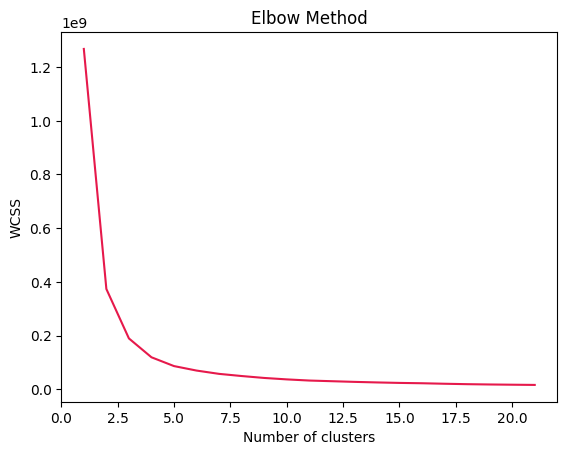

In [58]:
# We will plot the graph to get the no. of clusters
wcss = []
X = rfm_cleaned.drop('CustomerID', axis=1) # Assign rfm_cleaned to X (excluding CustomerID)
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

No of cluster required is 4

### **Dendogram**

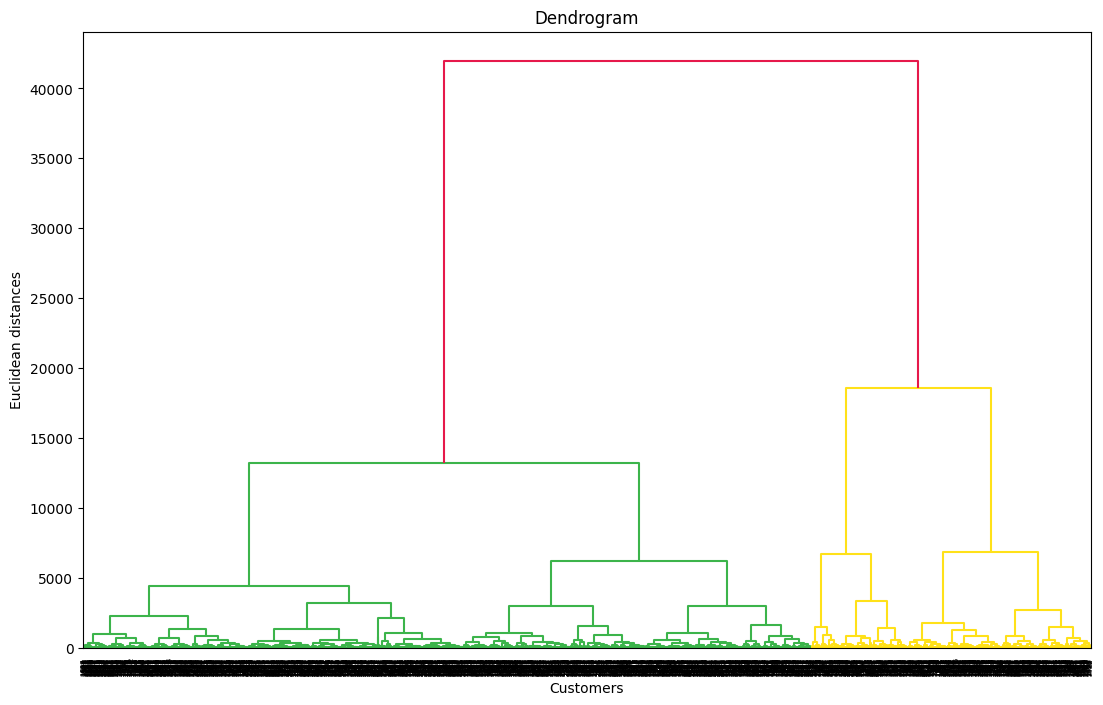

In [59]:
# Plot the dendogram
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))

dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


### **Agglomerative Clustering**

In [60]:
# Let's  import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, linkage = 'ward')
y_hc = hc.fit_predict(X)

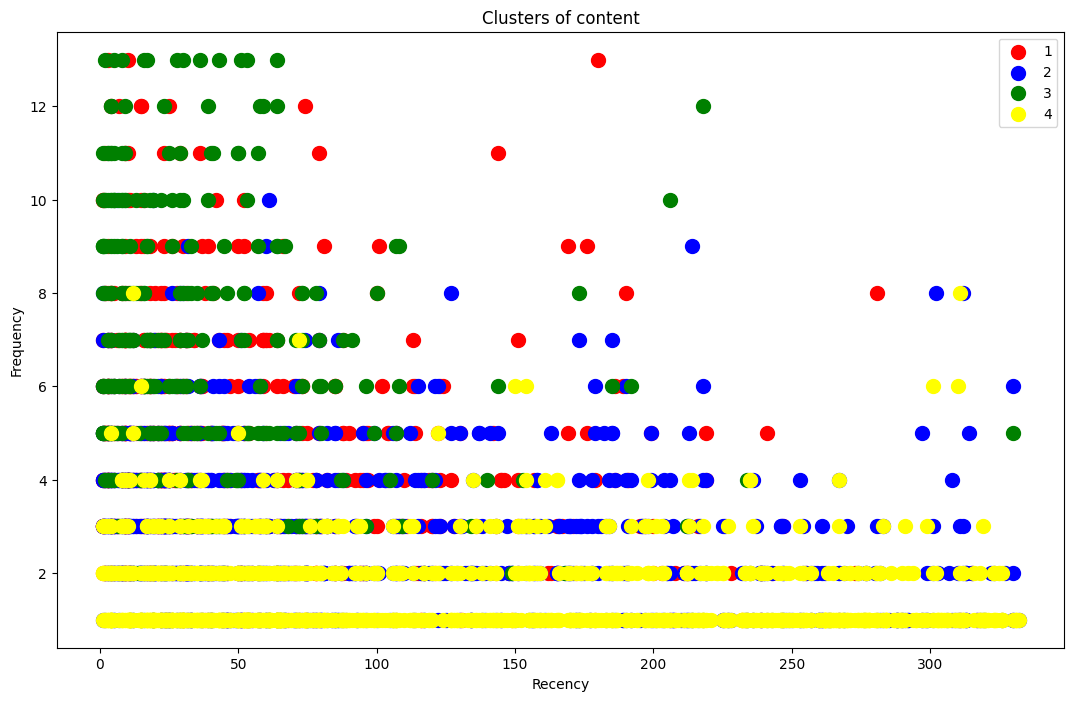

In [61]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0]['Recency'], X[y_hc == 0]['Frequency'], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1]['Recency'], X[y_hc == 1]['Frequency'], s = 100, c = 'blue', label = '2')
plt.scatter(X[y_hc == 2]['Recency'], X[y_hc == 2]['Frequency'], s = 100, c = 'green', label = '3')
plt.scatter(X[y_hc == 3]['Recency'], X[y_hc == 3]['Frequency'], s = 100, c = 'yellow', label = '4')
plt.title('Clusters of content')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [62]:
# Check Silhouette Score for each cluster
from sklearn.cluster import AgglomerativeClustering
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,5)] # Start range from 2
for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    #centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6398629919017187
For n_clusters = 3, silhouette score is 0.5835510668977217
For n_clusters = 4, silhouette score is 0.46266744286810496


### **KMeans Clustering**

#### **Model fitting**

In [63]:
# fitting the k means algorithm on lower features

kmeans= KMeans(n_clusters=4, init= 'k-means++',max_iter=50, n_init=1)
kmeans.fit(X)

KMeans(max_iter=50, n_clusters=4, n_init=1)

**calculating silhouette score**

In [64]:
from sklearn.metrics import silhouette_score
print("Silhouette Coefficient:  %0.3f"%silhouette_score(X, kmeans.labels_))

Silhouette Coefficient:  0.523


**Predicting**

In [65]:
#predict the labels of clusters.
label = kmeans.fit_predict(X)

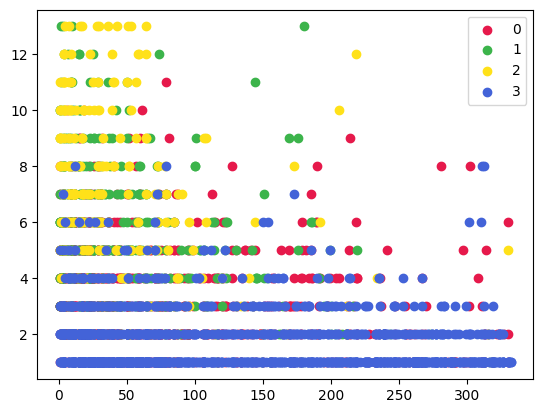

In [66]:
#Getting unique labels
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(X[label == i]['Recency'] , X[label == i]['Frequency'] , label = i)
plt.rcParams["figure.figsize"] = (20,8)
plt.legend()
plt.show()

**we now assign our clusters in our dataset by creating a new column "clusters"**

In [67]:
# Assigning clusters to our data
rfm_cleaned['clusters'] = kmeans.labels_

In [68]:
# checking how it is working
df.head(2)

,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice,Hour,Day,InvoiceMonth,InvoiceHour,InvoiceDayOfWeek,IsWeekend
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,8,Wednesday,12,8,2,0
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,8,Wednesday,12,8,2,0


**Counting assigned to each cluster**

In [69]:
# Counting content in each cluster
cluster_content_count = rfm_cleaned['clusters'].value_counts().reset_index().rename(columns={'index':'clusters','clusters':'Customer Count'})
cluster_content_count

,Customer Count,count
0,3,1570
1,0,892
2,1,447
3,2,230


### **Evaluation Metrics**

#### **Silhouette Score -**

In [70]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.6627444110218668
For n_clusters = 3 The average silhouette_score is : 0.5595733399841188
For n_clusters = 4 The average silhouette_score is : 0.5230160784100581


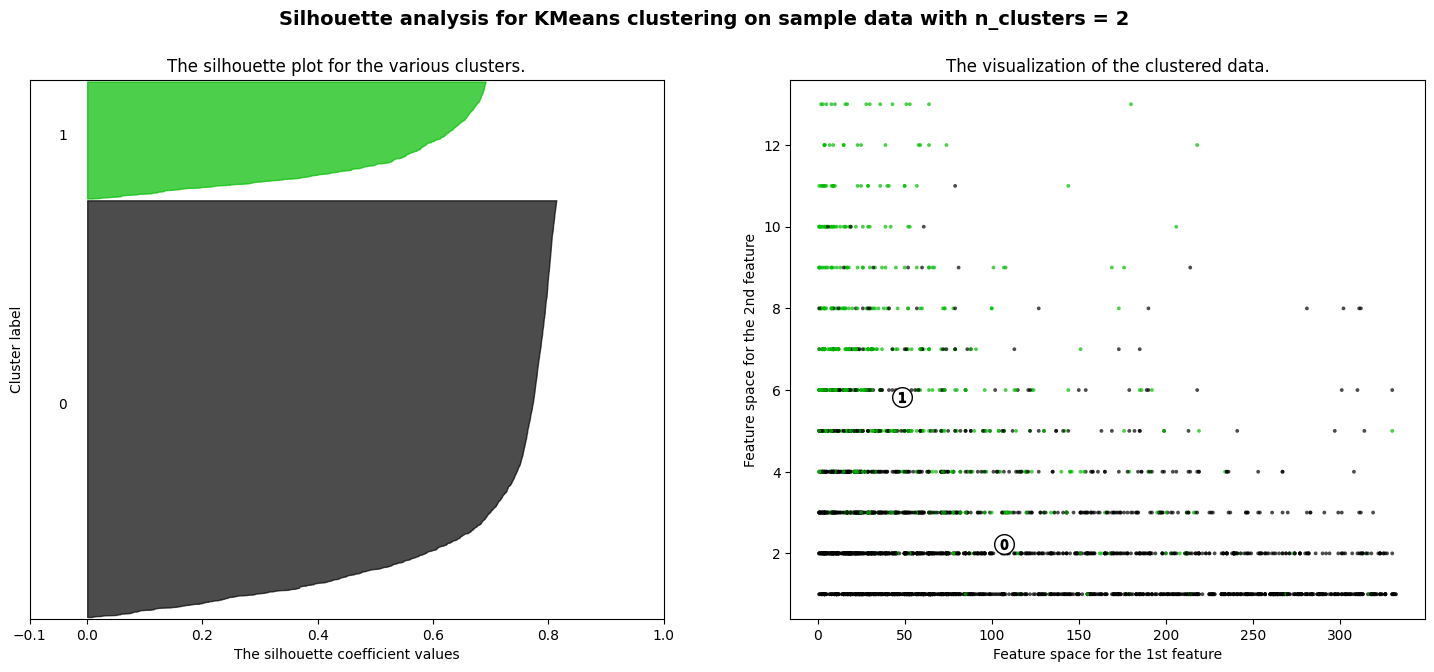

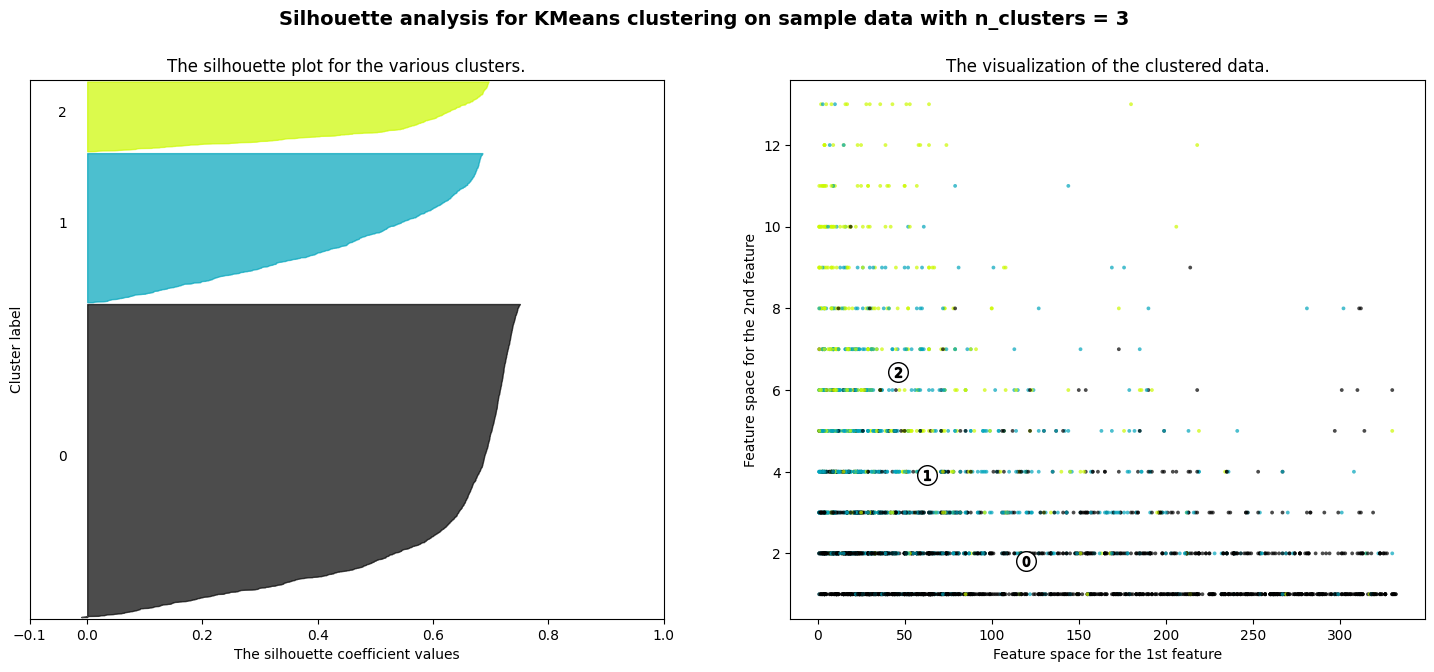

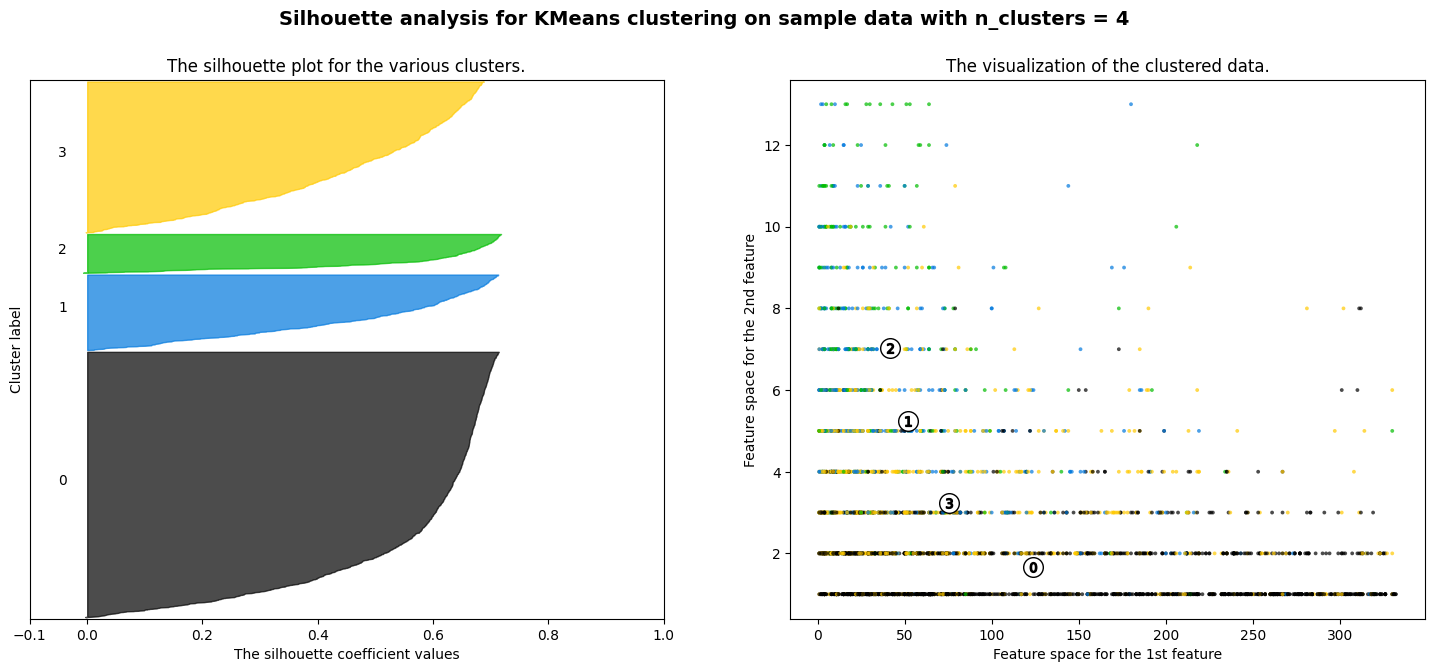

In [71]:
range_n_clusters = [i for i in range(2,5)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X['Recency'], X['Frequency'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### **Conclusion**

In this project, we performed customer segmentation using RFM (Recency, Frequency, Monetary) analysis and applied clustering techniques such as K-Means and Agglomerative Clustering. By analyzing customer behavior, we successfully grouped customers into meaningful segments. These clusters help identify high-value customers, frequent buyers, and those at risk of churn. Such insights can be used to design targeted marketing strategies, improve customer retention, and boost overall business performance.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***